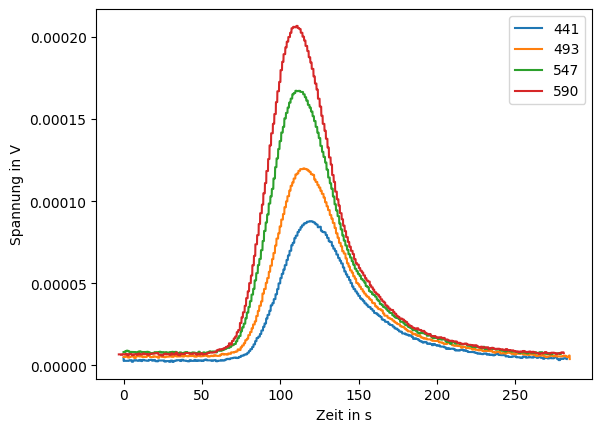

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

def reverse_list(l):
    ret = []
    for i in range(len(l)):
        ret.append(l[len(l)-i-1])
    return ret

def offset(l:list, move:int):
    ret = []
    for i in range(len(l)):
        ret.append(l[i] + move)
    return ret

file = pd.read_csv('data5.csv', sep=',')
file2 = pd.read_csv('data6.csv', sep=',')
file1 = pd.read_csv('data7.csv', sep=',')
file3 = pd.read_csv('data8.csv', sep=',')
#file4 = pd.read_csv('data20.csv', sep=',')

plt.plot(file['x'], file['y'], label='441')
plt.plot(reverse_list(file2['x']), file2['y'], label='493')
plt.plot(file1['x'], file1['y'], label='547')
plt.plot(offset(reverse_list(file3['x']), -3), file3['y'], label='590')

plt.legend()
plt.xlabel('Zeit in s')
plt.ylabel('Spannung in V')
plt.savefig('full_plot.svg', bbox_inches='tight')
plt.show()

In [40]:
import numpy as np
from scipy.optimize import curve_fit

In [41]:
file01 = pd.read_csv('kalibrirung0.csv')
file02 = pd.read_csv('kalibrirung1.csv')

def return_max(l):
    for i in range(len(file01['y'])):
        if l[i] == max(l):
            return i

t_max_1 = round(file01['x'][return_max(reverse_list(file01['y']))])
t_max_2 = round(file02['x'][return_max(reverse_list(file02['y']))])

print('{},{}'.format(t_max_1, t_max_2))

lam_1 = 4200
lam_2 = 2310

m = abs((lam_2 - lam_1) / (t_max_2 - t_max_1))
print(f'{m}')

76,113
51.08108108108108


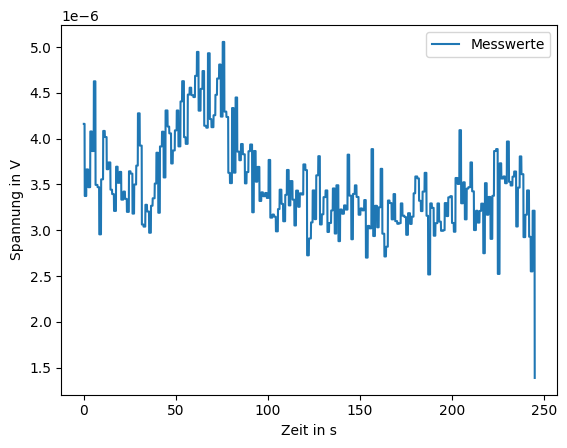

In [42]:
x1 = np.linspace(m*min(file01['x']), m*max(file01['x']), num=len(file01['y']))

plt.plot(file01['x'], reverse_list(file01['y']), label='Messwerte')

plt.xlabel('Zeit in s')
plt.ylabel('Spannung in V')

plt.legend()
plt.savefig('kalibrirung0.svg',bbox_inches='tight')

plt.show()


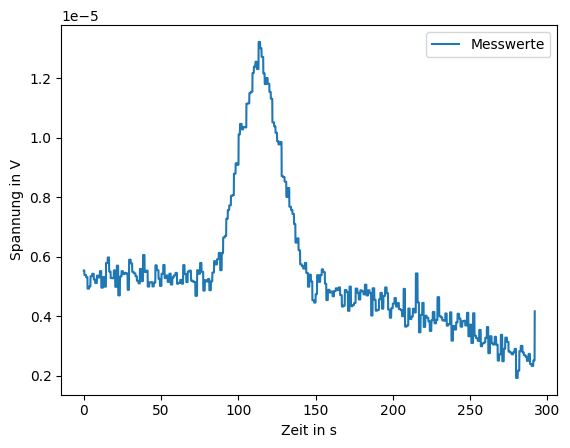

In [43]:

x2 = np.linspace(m*min(file02['x']), m*max(file02['x']), num=len(file02['y']))

plt.plot(file02['x'], reverse_list(file02['y']), label='Messwerte')

plt.xlabel('Zeit in s')
plt.ylabel('Spannung in V')

plt.legend()
plt.savefig('kalibrirung1.svg',bbox_inches='tight')
plt.show()

In [44]:
k_B = 1.38e-23
h = 6.626e-34
c = 299792458
exp = 2.7182818284

def plank_strahlung(_Lambda, T):
    return 8*np.pi*h*c/(pow(_Lambda, 5)*(pow(exp, h*c/(_Lambda*k_B*T)) - 1))


In [45]:
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{siunitx}')


/tmp/ipykernel_5293/4015471001.py:7: RuntimeWarning: overflow encountered in power
  return 8*np.pi*h*c/(pow(_Lambda, 5)*(pow(exp, h*c/(_Lambda*k_B*T)) - 1))


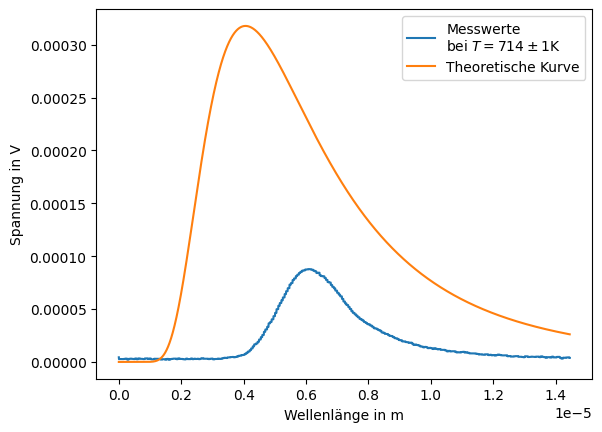

In [46]:
x3 = np.linspace(m*min(file['x'])*1e-9, m*max(file['x'])*1e-9, num=len(file['y']))
x_fit = np.linspace(min(x3), max(x3), num=len(x3))
y_fit = plank_strahlung(x_fit, 714)*1e-5

plt.plot(x3, file['y'], label='Messwerte\nbei 'r'$T=714\pm1$K')
plt.plot(x_fit, y_fit, label='Theoretische Kurve')

plt.xlabel('Wellenlänge in m')
plt.ylabel('Spannung in V')

plt.legend()
plt.savefig('plot441.svg', bbox_inches='tight')
plt.show()

/tmp/ipykernel_5293/4015471001.py:7: RuntimeWarning: overflow encountered in power
  return 8*np.pi*h*c/(pow(_Lambda, 5)*(pow(exp, h*c/(_Lambda*k_B*T)) - 1))


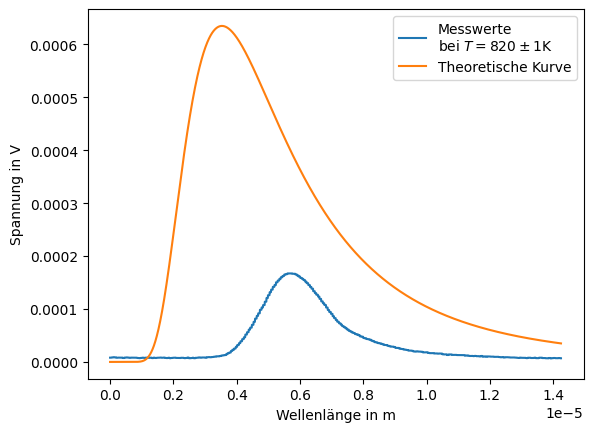

In [47]:
x4 = np.linspace(m*min(file1['x'])*1e-9, m*max(file1['x'])*1e-9, num=len(file1['y']))
x_fit = np.linspace(min(x4), max(x4), num=len(x4))

y_fit = plank_strahlung(x_fit, 820)*1e-5

plt.plot(x4, file1['y'], label='Messwerte\nbei 'r'$T=820\pm1$K')
plt.plot(x_fit, y_fit, label='Theoretische Kurve')

plt.xlabel('Wellenlänge in m')
plt.ylabel('Spannung in V')

plt.legend()
plt.savefig('plot493.svg', bbox_inches='tight')
plt.show()

/tmp/ipykernel_5293/4015471001.py:7: RuntimeWarning: overflow encountered in power
  return 8*np.pi*h*c/(pow(_Lambda, 5)*(pow(exp, h*c/(_Lambda*k_B*T)) - 1))


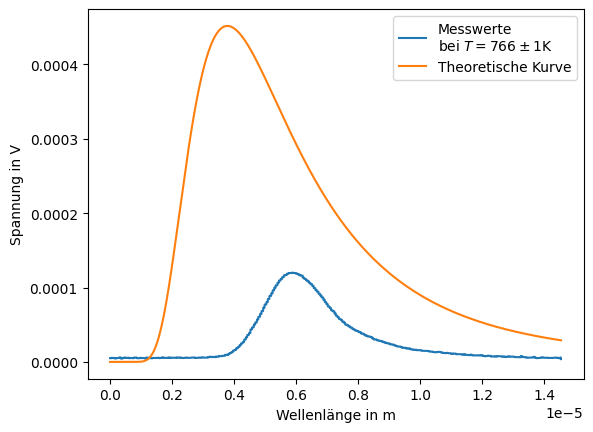

In [48]:
x5 = np.linspace(m*min(file2['x'])*1e-9, m*max(file2['x'])*1e-9, num=len(file2['y']))
x_fit = np.linspace(min(x5), max(x5), num=len(x5))

y_fit = plank_strahlung(x_fit, 766)*1e-5

plt.plot(x5, reverse_list(file2['y']), label='Messwerte\nbei 'r'$T=766\pm1$K')
plt.plot(x_fit, y_fit, label='Theoretische Kurve')

plt.xlabel('Wellenlänge in m')
plt.ylabel('Spannung in V')

plt.legend()
plt.savefig('plot547.svg', bbox_inches='tight')
plt.show()

/tmp/ipykernel_5293/4015471001.py:7: RuntimeWarning: overflow encountered in power
  return 8*np.pi*h*c/(pow(_Lambda, 5)*(pow(exp, h*c/(_Lambda*k_B*T)) - 1))


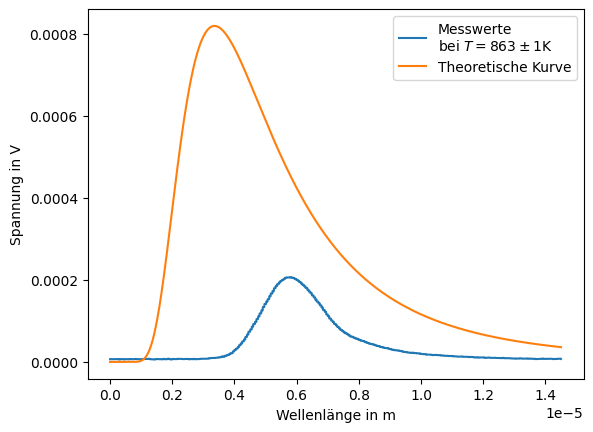

In [49]:
x6 = np.linspace(m*min(file3['x'])*1e-9, m*max(file3['x'])*1e-9, num=len(file3['y']))
x_fit = np.linspace(min(x6), max(x6), num=len(x6))

y_fit = plank_strahlung(x_fit, 863)*1e-5

plt.plot(x6, reverse_list(file3['y']), label='Messwerte\nbei 'r'$T=863\pm1$K')
plt.plot(x_fit, y_fit, label='Theoretische Kurve')

plt.xlabel('Wellenlänge in m')
plt.ylabel('Spannung in V')

plt.legend()
plt.savefig('plot590.svg', bbox_inches='tight')
plt.show()

In [50]:
def get_max(l1):
    for i in range(len(l1)):
        if max(l1) == l1[i]:
            return i 



In [59]:
i1 = get_max(file['y'])
i3 = get_max(reverse_list(file2['y']))
i2 = get_max(file1['y'])
i4 = get_max(reverse_list(file3['y']))

In [61]:
print('{}, {}, {}, {}'.format(x3[i1], x4[i2], x5[i3], x6[i4]))

6.077522184669223e-06, 5.605004839065994e-06, 5.858284271130023e-06, 5.7858236399966304e-06


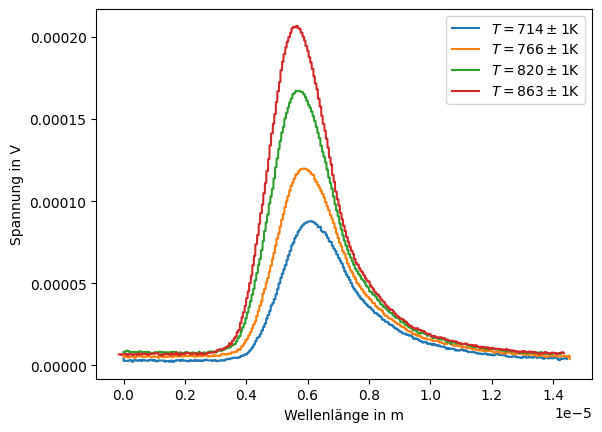

In [53]:
x7 = np.linspace(m*min(offset(file3['x'], -3))*1e-9, m*max(offset(file3['x'], -3))*1e-9, num=len(file3['x']))

plt.plot(x3, file['y'], label=r'$T=714\pm1$K')
plt.plot(x5, reverse_list(file2['y']), label=r'$T=766\pm1$K')
plt.plot(x4, file1['y'], label=r'$T=820\pm1$K')
plt.plot(x7, reverse_list(file3['y']), label=r'$T=863\pm1$K')

plt.legend()
plt.xlabel('Wellenlänge in m')
plt.ylabel('Spannung in V')
plt.savefig('full_plot.svg', bbox_inches='tight')
plt.show()

/tmp/ipykernel_5293/853325349.py:11: RuntimeWarning: overflow encountered in power
  return 8*np.pi*h*c/(pow(_Lambda, 5)*(pow(exp, h*c/(_Lambda*k_B*T)) - 1))


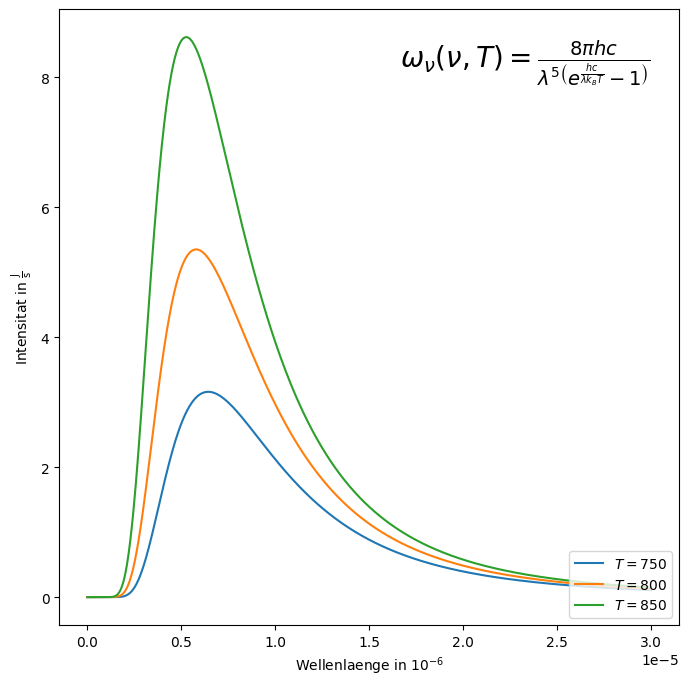

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

k_B = 1.38e-23
h = 6.626e-34
c = 299792458
exp = 2.7182818284

def plank_strahlung(_Lambda, T):
    return 8*np.pi*h*c/(pow(_Lambda, 5)*(pow(exp, h*c/(_Lambda*k_B*T)) - 1))

wellenlaenge = np.linspace(1e-8, 3e-5, num=1000)
intensitat_1 = plank_strahlung(wellenlaenge, 450)
intensitat_2 = plank_strahlung(wellenlaenge, 500)
intensitat_3 = plank_strahlung(wellenlaenge, 550)

fig, ax = plt.subplots(figsize=(8, 8))
ax.text(max(wellenlaenge), max(intensitat_3), r'$\omega_{\nu}(\nu, T)=\frac{8\pi h c}{\lambda^5\left(e^{\frac{hc}{\lambda k_B T}}-1\right)}$', ha='right', va='top', fontsize='20')

plt.plot(wellenlaenge, intensitat_1, label=r'$T=750$')
plt.plot(wellenlaenge, intensitat_2, label=r'$T=800$')
plt.plot(wellenlaenge, intensitat_3, label=r'$T=850$')

plt.xlabel(r'Wellenlaenge in $10^{-6}$')
plt.ylabel('Intensitat in 'r'$\frac{\text{J}}{\text{s}}$')

plt.legend(loc='lower right')
plt.savefig('theo_werte.svg')
plt.show()

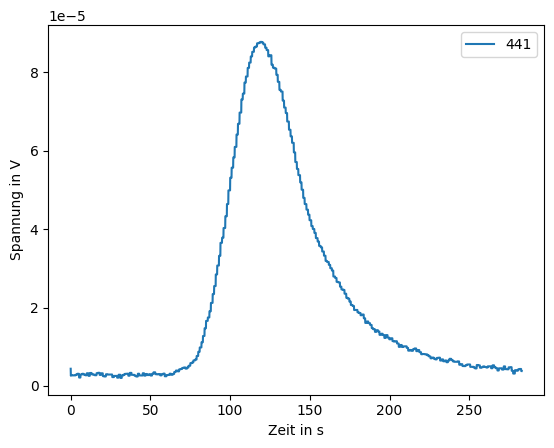

In [55]:
plt.plot(file['x'], file['y'], label='441')
plt.xlabel('Zeit in s')
plt.ylabel('Spannung in V')


plt.legend()
plt.savefig('data441.svg')
plt.show()

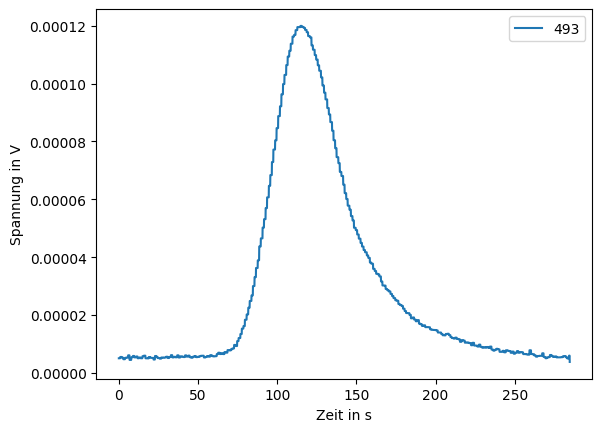

In [56]:
plt.plot(reverse_list(file2['x']), file2['y'], label='493')
plt.xlabel('Zeit in s')
plt.ylabel('Spannung in V')


plt.legend()
plt.savefig('data493.svg')
plt.show()

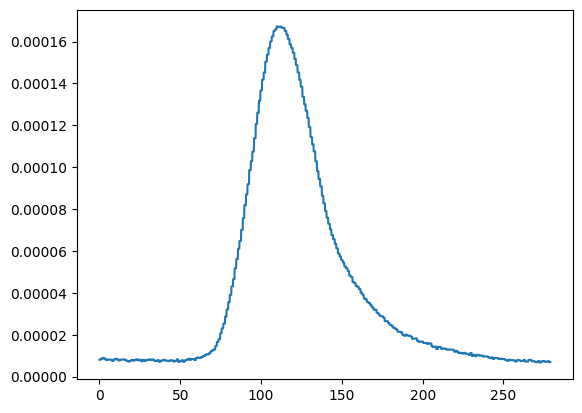

In [57]:
plt.plot(file1['x'], file1['y'], label='547')


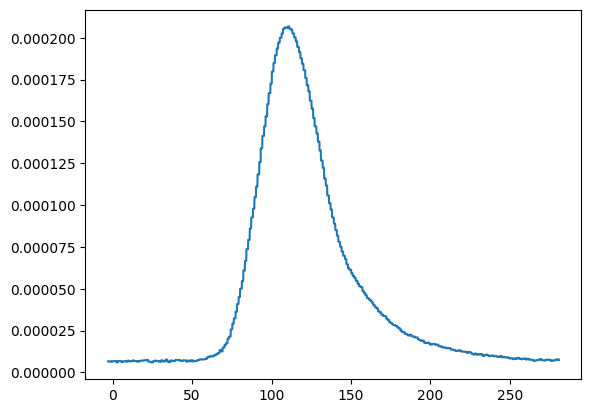

In [58]:
plt.plot(offset(reverse_list(file3['x']), -3), file3['y'], label='590')